In [1]:
#PCA: technique to reduce the dimensionality of the dataset while loosing least amount of data
#if we have 2 columns in our dataset which we wish to work with, however they're in inch and cm , means couldn't compare them together.
#unsupervised algo, just use it on features matrix

import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [2]:
data= load_iris()
df= pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
speciesDic= {0:'type0',1:'type1',2:'type2'}

In [11]:
df.loc[:,'target']=df.loc[:,'target'].apply(lambda x: speciesDic[x])

KeyError: ignored

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,type1
1,4.9,3.0,1.4,0.2,type1
2,4.7,3.2,1.3,0.2,type1
3,4.6,3.1,1.5,0.2,type1
4,5.0,3.6,1.4,0.2,type1


In [13]:
features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [14]:
x=df.loc[: ,features].values
y=df.loc[:,['target']].values

In [15]:
x=StandardScaler().fit_transform(x)

In [18]:
pca = PCA(n_components=2) #dimensionality reduction from 4 features to 2 components

In [19]:
principalComponent= pca.fit_transform(x)

In [20]:
principalDf= pd.DataFrame(data=principalComponent,columns=['principalComponent1','principalComponent2'])

In [21]:
finalDf=pd.concat([principalDf,df['target']],axis=1)

In [32]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [33]:
sum(pca.explained_variance_ratio_) #means that totally around 96% of information is conserved and only 4% od data is lost

0.9581320720000165

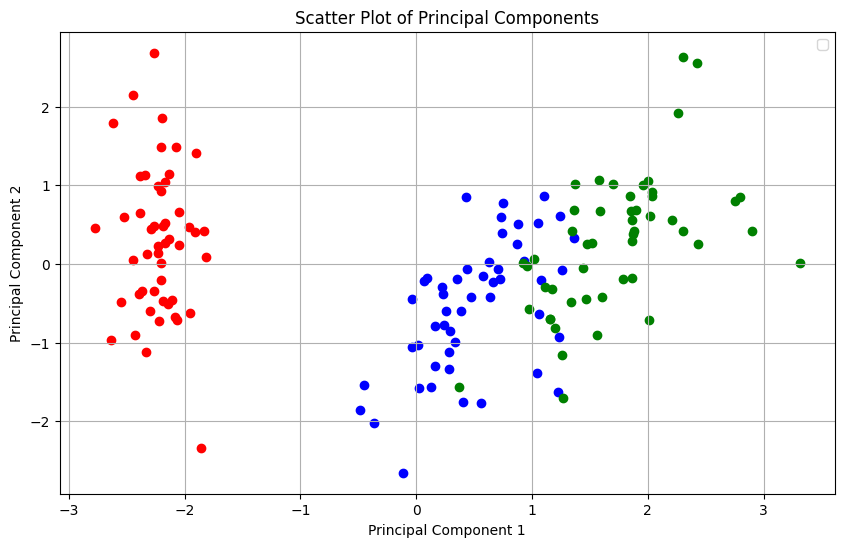

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
targets=df.loc[:,'target'].unique()
colors=['r','b','g']
for target , color in zip(targets,colors):
  featuresToKeep=finalDf['target']==target
  ax.scatter(finalDf.loc[featuresToKeep,'principalComponent1'],finalDf.loc[featuresToKeep,'principalComponent2'],c=color)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Scatter Plot of Principal Components')
ax.legend()
ax.grid()

plt.show()